In [1]:
!git clone https://github.com/creotiv/hdrnet

Cloning into 'hdrnet'...
remote: Enumerating objects: 130, done.
remote: Total 130 (delta 0), reused 0 (delta 0), pack-reused 130
Receiving objects: 100% (130/130), 9.11 MiB | 13.93 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [1]:
cd hdrnet/hdrnet

/content/hdrnet/hdrnet


In [3]:
!pip install numpy pyglib scikit_image python_gflags python_magic setproctitle

    100% |████████████████████████████████| 61kB 4.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/b8/15/32/9a2dadd7c1f977c126ca5ee9909617aef1759cf10317318854
  Stored in directory: /root/.cache/pip/wheels/ef/ee/0e/63b3049d40b223fe2d177a18acff993ac5e491e66a1744c3b6
Successfully built pyglib python-gflags


In [4]:
!lsb_release -a
!cat /usr/local/cuda/version.txt

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic
CUDA Version 10.0.130


In [5]:
!wget https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda-repo-ubuntu1804-10-0-local-10.0.130-410.48_1.0-1_amd64
!dpkg -i cuda-repo-ubuntu1804-10-0-local-10.0.130-410.48_1.0-1_amd64

--2019-04-26 14:32:11--  https://developer.nvidia.com/compute/cuda/10.0/Prod/local_installers/cuda-repo-ubuntu1804-10-0-local-10.0.130-410.48_1.0-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 192.229.162.216
Connecting to developer.nvidia.com (developer.nvidia.com)|192.229.162.216|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/10.0/secure/Prod/local_installers/cuda-repo-ubuntu1804-10-0-local-10.0.130-410.48_1.0-1_amd64.deb?xgVCPUiD_RwX6fOHpGGbbYarbptDM2z91mXc_jhFAA5eEko8hmQQryrnc5cthGj3Ucp1kOJfcnoWh4aY31-5N-vUk8-jKAwkhCSgwIH9eZ9ud_eOXmuftYeFjnE6YmFUjNdCqw8nKDRfmwYvkdD5EpcErkgE5089EXPhQQtGtVv2gZhjIHn1D_79LFQlwPb23OeJ2gSWLS7Kb9NELA3xJPqL4ppXWhEcYYBnzxE [following]
--2019-04-26 14:32:12--  https://developer.download.nvidia.com/compute/cuda/10.0/secure/Prod/local_installers/cuda-repo-ubuntu1804-10-0-local-10.0.130-410.48_1.0-1_amd64.deb?xgVCPUiD_RwX6fOHpGGbbYarbptDM2z91mXc_jhFAA5eEko8hmQQr

In [14]:
!apt-key add /var/cuda-repo-10-0-local-10.0.130-410.48/7fa2af80.pub
!apt-get update -qq;
!apt-cache policy cuda

cuda:
  Installed: 10.0.130-1
  Candidate: 10.1.105-1
  Version table:
     10.1.105-1 500
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
 *** 10.0.130-1 500
        500 file:/var/cuda-repo-10-0-local-10.0.130-410.48  Packages
        500 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
        100 /var/lib/dpkg/status


In [11]:
!apt-get install cuda=10.0.130-1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda is already the newest version (10.0.130-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [13]:
!apt-cache policy cuda

E: Invalid operation info


In [15]:
!apt-get install gcc-5 g++-5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;

Selecting previously unselected package gcc-5-base:amd64.
(Reading database ... 131399 files and directories currently installed.)
Preparing to unpack .../0-gcc-5-base_5.5.0-12ubuntu1_amd64.deb ...
Unpacking gcc-5-base:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libisl15:amd64.
Preparing to unpack .../1-libisl15_0.18-4_amd64.deb ...
Unpacking libisl15:amd64 (0.18-4) ...
Selecting previously unselected package cpp-5.
Preparing to unpack .../2-cpp-5_5.5.0-12ubuntu1_amd64.deb ...
Unpacking cpp-5 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libasan2:amd64.
Preparing to unpack .../3-libasan2_5.5.0-12ubuntu1_amd64.deb ...
Unpacking libasan2:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libmpx0:amd64.
Preparing to unpack .../4-libmpx0_5.5.0-12ubuntu1_amd64.deb ...
Unpacking libmpx0:amd64 (5.5.0-12ubuntu1) ...
Selecting previously unselected package libgcc-5-dev:amd64.
Preparing to unpack .../5-libgcc-5-dev_5.5.0-12ubuntu1_amd64.de

In [1]:
import os
import sys
os.environ['CUDA_HOME'] = '/usr/local/cuda'
os.environ['PATH'] += ':/content/hdrnet'
!echo $CUDA_HOME
!echo $PATH

/usr/local/cuda
/usr/local/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/hdrnet


In [8]:
!make clean
!make

rm -rf build lib
mkdir -p build
nvcc -std c++11 -c  ops/bilateral_slice.cu.cc -o build/bilateral_slice.cu.o -DGOOGLE_CUDA=1 -DNDEBUG -x cu -Xcompiler -fPIC -I /usr/local -I`python -c 'import tensorflow as tf; print(tf.sysconfig.get_include())'` `python -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_compile_flags()))'` `python -c 'import tensorflow as tf; print(" ".join(tf.sysconfig.get_link_flags()))'` -expt-relaxed-constexpr -Wno-deprecated-gpu-targets -ftz=true
In file included from /usr/local/lib/python3.6/dist-packages/tensorflow/include/unsupported/Eigen/CXX11/../../../Eigen/src/Core/util/ConfigureVectorization.h:384:0,
                 from /usr/local/lib/python3.6/dist-packages/tensorflow/include/unsupported/Eigen/CXX11/../../../Eigen/Core:22,
                 from /usr/local/lib/python3.6/dist-packages/tensorflow/include/unsupported/Eigen/CXX11/Tensor:14,
                 from /usr/local/lib/python3.6/dist-packages/tensorflow/include/third_party/eigen3/unsupported

In [2]:
cd ../

/content/hdrnet


In [3]:
!wget https://data.csail.mit.edu/graphics/hdrnet/pretrained_models.zip
!unzip pretrained_models.zip

--2019-04-26 16:47:53--  https://data.csail.mit.edu/graphics/hdrnet/pretrained_models.zip
Resolving data.csail.mit.edu (data.csail.mit.edu)... 128.52.129.40
Connecting to data.csail.mit.edu (data.csail.mit.edu)|128.52.129.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235701996 (225M) [application/zip]
Saving to: ‘pretrained_models.zip’

pretrained_models.z 100%[===================>] 224.78M  9.68MB/s    in 15s     

2019-04-26 16:48:08 (15.4 MB/s) - ‘pretrained_models.zip’ saved [235701996/235701996]

Archive:  pretrained_models.zip
   creating: pretrained_models/
   creating: pretrained_models/hdrp/
  inflating: pretrained_models/hdrp/upgraded_from_sig2017.ckpt-0.data-00000-of-00001  
  inflating: pretrained_models/hdrp/upgraded_from_sig2017.ckpt-0.meta  
  inflating: pretrained_models/hdrp/checkpoint  
  inflating: pretrained_models/hdrp/upgraded_from_sig2017.ckpt-0.index  
   creating: pretrained_models/experts/
   creating: pretrained_models/experts/e

In [0]:
from google.colab import files
import os
def upload(path):
    uploaded = files.upload()
    with open(path,'wb') as fp:
        fp.write(uploaded[list(uploaded.keys())[0]])
 
def download(path):
    files.download(path)
    
os.makedirs('./in')
os.makedirs('./out')


In [13]:
cd in

/content/hdrnet/in


In [14]:
upload('test.jpg')

Saving 10463862_650987304978820_6606705166704554784_n.jpg to 10463862_650987304978820_6606705166704554784_n.jpg


In [15]:
cd ..

/content/hdrnet


In [0]:
#@title Runner
#!/usr/bin/env python
# encoding: utf-8
# Copyright 2016 Google Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

"""Evaluates a trained network."""

import argparse
import cv2
import logging
import numpy as np
import os
import re
import setproctitle
import skimage
import skimage.io
import skimage.transform
import sys
import time
import tensorflow as tf

import hdrnet.models as models
import hdrnet.utils as utils


logging.basicConfig(format="[%(process)d] %(levelname)s %(filename)s:%(lineno)s | %(message)s")
log = logging.getLogger("train")
log.setLevel(logging.INFO)


def get_input_list(path):
  regex = re.compile(".*.(png|jpeg|jpg|tif|tiff)")
  if os.path.isdir(path):
    inputs = os.listdir(path)
    inputs = [os.path.join(path, f) for f in inputs if regex.match(f)]
    log.info("Directory input {}, with {} images".format(path, len(inputs)))

  elif os.path.splitext(path)[-1] == ".txt":
    dirname = os.path.dirname(path)
    with open(path, 'r') as fid:
      inputs = [l.strip() for l in fid.readlines()]
    inputs = [os.path.join(dirname, 'input', im) for im in inputs]
    log.info("Filelist input {}, with {} images".format(path, len(inputs)))
  elif regex.match(path):
    inputs = [path]
    log.info("Single input {}".format(path))
  return inputs


def main(args):
  setproctitle.setproctitle('hdrnet_run')

  inputs = get_input_list(args.input)

  # -------- Load params ----------------------------------------------------
  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  with tf.Session(config=config) as sess:
    checkpoint_path = tf.train.latest_checkpoint(args.checkpoint_dir)
    if checkpoint_path is None:
      log.error('Could not find a checkpoint in {}'.format(args.checkpoint_dir))
      return

    metapath = ".".join([checkpoint_path, "meta"])
    log.info('Loading graph from {}'.format(metapath))
    tf.train.import_meta_graph(metapath)

    model_params = utils.get_model_params(sess)

  # -------- Setup graph ----------------------------------------------------
  model_params['output_resolution'] = model_params['output_resolution'].tolist()
  for i in ['depth','n_rate_one','spatial_bin','luma_bins', 'width', 'net_input_size', 'channel_multiplier']:
    model_params[i] = model_params[i].item() 
  if not hasattr(models, model_params['model_name'].decode('utf8')):
    log.error("Model {} does not exist".format(params.model_name))
    return
  mdl = getattr(models, model_params['model_name'].decode('utf8'))
  tf.reset_default_graph()
  net_shape = model_params['net_input_size']
  t_fullres_input = tf.placeholder(tf.float32, (1, None, None, 3))
  t_lowres_input = tf.placeholder(tf.float32, (1, net_shape, net_shape, 3))
  with tf.variable_scope('inference'):
    prediction = mdl.inference(
        t_lowres_input, t_fullres_input, model_params, is_training=False)
  output = tf.cast(255.0*tf.squeeze(tf.clip_by_value(prediction, 0, 1)), tf.uint8)
  saver = tf.train.Saver()
  if args.debug:
    coeffs = tf.get_collection('bilateral_coefficients')[0]
    if len(coeffs.get_shape().as_list()) == 6:
      bs, gh, gw, gd, no, ni = coeffs.get_shape().as_list()
      coeffs = tf.transpose(coeffs, [0, 3, 1, 4, 5, 2])
      coeffs = tf.reshape(coeffs, [bs, gh*gd, gw*ni*no, 1])
      coeffs = tf.squeeze(coeffs)
      m = tf.reduce_max(tf.abs(coeffs))
      coeffs = tf.clip_by_value((coeffs+m)/(2*m), 0, 1)

    ms = tf.get_collection('multiscale')
    if len(ms) > 0:
      for i, m in enumerate(ms):
        maxi = tf.reduce_max(tf.abs(m))
        m = tf.clip_by_value((m+maxi)/(2*maxi), 0, 1)
        sz = tf.shape(m)
        m = tf.transpose(m, [0, 1, 3, 2])
        m = tf.reshape(m, [sz[0], sz[1], sz[2]*sz[3]])
        ms[i] = tf.squeeze(m)

    fr = tf.get_collection('fullres_features')
    if len(fr) > 0:
      for i, m in enumerate(fr):
        maxi = tf.reduce_max(tf.abs(m))
        m = tf.clip_by_value((m+maxi)/(2*maxi), 0, 1)
        sz = tf.shape(m)
        m = tf.transpose(m, [0, 1, 3, 2])
        m = tf.reshape(m, [sz[0], sz[1], sz[2]*sz[3]])
        fr[i] = tf.squeeze(m)

    guide = tf.get_collection('guide')
    if len(guide) > 0:
      for i, g in enumerate(guide):
        maxi = tf.reduce_max(tf.abs(g))
        g = tf.clip_by_value((g+maxi)/(2*maxi), 0, 1)
        guide[i] = tf.squeeze(g)

  with tf.Session(config=config) as sess:
    log.info('Restoring weights from {}'.format(checkpoint_path))
    saver.restore(sess, checkpoint_path)
    print('sdfsdfs')
    for idx, input_path in enumerate(inputs):
      if args.limit is not None and idx >= args.limit:
        log.info("Stopping at limit {}".format(args.limit))
        break

      log.info("Processing {}".format(input_path))
      im_input = cv2.imread(input_path, -1)  # -1 means read as is, no conversions.
      if im_input.shape[2] == 4:
        log.info("Input {} has 4 channels, dropping alpha".format(input_path))
        im_input = im_input[:, :, :3]

      im_input = np.flip(im_input, 2)  # OpenCV reads BGR, convert back to RGB.

      log.info("Max level: {}".format(np.amax(im_input[:, :, 0])))
      log.info("Max level: {}".format(np.amax(im_input[:, :, 1])))
      log.info("Max level: {}".format(np.amax(im_input[:, :, 2])))

      # HACK for HDR+.
      if im_input.dtype == np.uint16 and args.hdrp:
        log.info("Using HDR+ hack for uint16 input. Assuming input white level is 32767.")
        # im_input = im_input / 32767.0
        # im_input = im_input / 32767.0 /2
        # im_input = im_input / (1.0*2**16)
        im_input = skimage.img_as_float(im_input)
      else:
        im_input = skimage.img_as_float(im_input)

      # Make or Load lowres image
      if args.lowres_input is None:
        lowres_input = skimage.transform.resize(
            im_input, [net_shape, net_shape], order = 0)
      else:
        raise NotImplemented

      fname = os.path.splitext(os.path.basename(input_path))[0]
      output_path = os.path.join(args.output, fname+".png")
      basedir = os.path.dirname(output_path)

      im_input = im_input[np.newaxis, :, :, :]
      lowres_input = lowres_input[np.newaxis, :, :, :]

      feed_dict = {
          t_fullres_input: im_input,
          t_lowres_input: lowres_input
      }

      out_ =  sess.run(output, feed_dict=feed_dict)

      if not os.path.exists(basedir):
        os.makedirs(basedir)

      skimage.io.imsave(output_path, out_)

      if args.debug:
        output_path = os.path.join(args.output, fname+"_input.png")
        skimage.io.imsave(output_path, np.squeeze(im_input))

        coeffs_ = sess.run(coeffs, feed_dict=feed_dict)
        output_path = os.path.join(args.output, fname+"_coeffs.png")
        skimage.io.imsave(output_path, coeffs_)
        if len(ms) > 0:
          ms_ = sess.run(ms, feed_dict=feed_dict)
          for i, m in enumerate(ms_):
            output_path = os.path.join(args.output, fname+"_ms_{}.png".format(i))
            skimage.io.imsave(output_path, m)

        if len(fr) > 0:
          fr_ = sess.run(fr, feed_dict=feed_dict)
          for i, m in enumerate(fr_):
            output_path = os.path.join(args.output, fname+"_fr_{}.png".format(i))
            skimage.io.imsave(output_path, m)

        if len(guide) > 0:
          guide_ = sess.run(guide, feed_dict=feed_dict)
          for i, g in enumerate(guide_):
            output_path = os.path.join(args.output, fname+"_guide_{}.png".format(i))
            skimage.io.imsave(output_path, g)





In [19]:
class Params:
#     checkpoint_dir = './hdrnet/pretrained_models/photoshop/instagram/'
  checkpoint_dir = './pretrained_models/photoshop/eboye/'
  checkpoint_dir = './pretrained_models/style_transfer/style_transfer_1024'
  input = './in/'
  output = './out/'
  debug = False
  limit=None
  nohdrp=True
  lowres_input=None
main(Params())

[5232] INFO <ipython-input-16-1d53fe30484d>:32 | Directory input ./in/, with 2 images
[5232] INFO <ipython-input-16-1d53fe30484d>:61 | Loading graph from ./pretrained_models/style_transfer/style_transfer_1024/upgraded_from_sig2017.ckpt-0.meta


'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


[5232] WARNING meta_graph.py:848 | The saved meta_graph is possibly from an older release:
'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.
[5232] INFO <ipython-input-16-1d53fe30484d>:121 | Restoring weights from ./pretrained_models/style_transfer/style_transfer_1024/upgraded_from_sig2017.ckpt-0


INFO:tensorflow:Restoring parameters from ./pretrained_models/style_transfer/style_transfer_1024/upgraded_from_sig2017.ckpt-0


[5232] INFO saver.py:1270 | Restoring parameters from ./pretrained_models/style_transfer/style_transfer_1024/upgraded_from_sig2017.ckpt-0
[5232] INFO <ipython-input-16-1d53fe30484d>:129 | Processing ./in/test.jpg
[5232] INFO <ipython-input-16-1d53fe30484d>:137 | Max level: 255
[5232] INFO <ipython-input-16-1d53fe30484d>:138 | Max level: 255
[5232] INFO <ipython-input-16-1d53fe30484d>:139 | Max level: 255
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


sdfsdfs


[5232] INFO <ipython-input-16-1d53fe30484d>:129 | Processing ./in/10463862_650987304978820_6606705166704554784_n.jpg
[5232] INFO <ipython-input-16-1d53fe30484d>:137 | Max level: 255
[5232] INFO <ipython-input-16-1d53fe30484d>:138 | Max level: 255
[5232] INFO <ipython-input-16-1d53fe30484d>:139 | Max level: 255


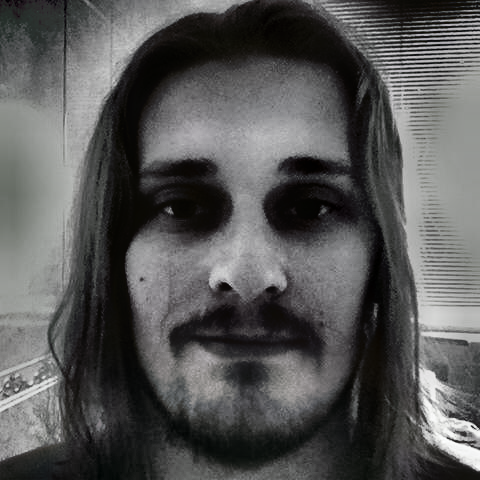

In [20]:
from IPython.display import Image, display
display(Image('./out/test.png'))

In [81]:
#Generate root password
import random, string
password = ''.join(random.choice(string.ascii_letters + string.digits) for i in range(20))

#Download ngrok
! wget -q -c -nc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip -qq -n ngrok-stable-linux-amd64.zip
#Setup sshd
! apt-get install -qq -o=Dpkg::Use-Pty=0 openssh-server pwgen > /dev/null
#Set root password
! echo root:$password | chpasswd
! mkdir -p /var/run/sshd
! echo "PermitRootLogin yes" >> /etc/ssh/sshd_config
! echo "PasswordAuthentication yes" >> /etc/ssh/sshd_config
! echo "LD_LIBRARY_PATH=/usr/lib64-nvidia" >> /root/.bashrc
! echo "export LD_LIBRARY_PATH" >> /root/.bashrc

#Run sshd
get_ipython().system_raw('/usr/sbin/sshd -D &')

#Ask token
print("Copy authtoken from https://dashboard.ngrok.com/auth")
import getpass
authtoken = getpass.getpass()

#Create tunnel
get_ipython().system_raw('./ngrok authtoken $authtoken && ./ngrok tcp 22 &')
#Print root password
print("Root password: {}".format(password))
#Get public address
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Copy authtoken from https://dashboard.ngrok.com/auth
··········
Root password: ZWNtc7PqUst03ZeaZxWy
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [82]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

tcp://0.tcp.ngrok.io:15505


In [80]:
!ps aux| grep ngrok
!kill -s 9 1764

root        2977  0.0  0.0  39196  6544 ?        S    15:33   0:00 /bin/bash -c ps aux| grep ngrok
root        2979  0.0  0.0  38572  5496 ?        S    15:33   0:00 grep ngrok
/bin/bash: line 0: kill: (1764) - No such process
